In [1]:
greetings = "Assalam-o-Alaikum!"
print(greetings)

Assalam-o-Alaikum!


### Import Libraries

In [2]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn.datasets
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

### Import Dataset

In [3]:
juice = sklearn.datasets.load_wine()

In [4]:
X = juice.data
y = juice.target

In [5]:
lr = LogisticRegression()

lr.fit(X, y)

y_pred = lr.predict(X)

pd.DataFrame({"Actual": y, "Predicted": y_pred})[::20]

,Actual,Predicted
0,0,0
20,0,0
40,0,0
60,1,1
80,1,1
100,1,1
120,1,1
140,2,2
160,2,2


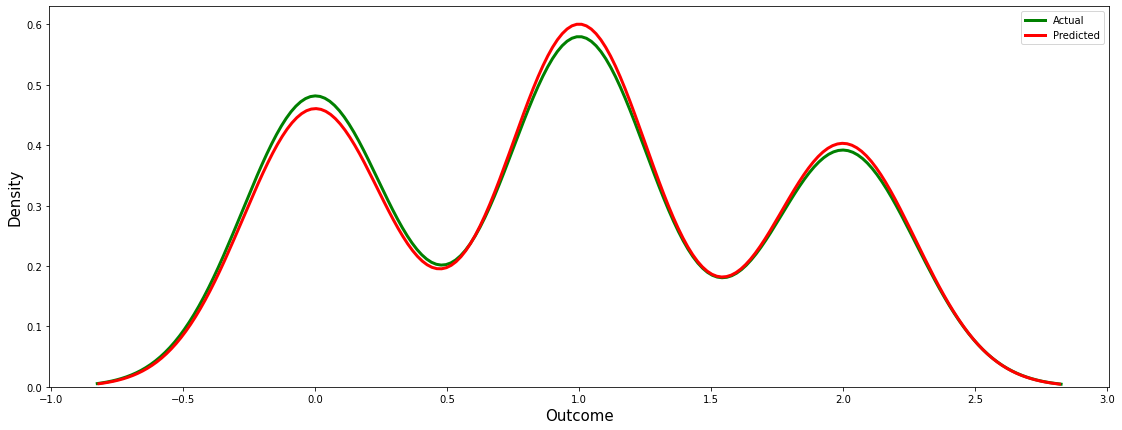

In [6]:
plt.figure(figsize = (19, 7))
sns.kdeplot(x = y, label = "Actual", linewidth = 3, color = "green")
sns.kdeplot(x = y_pred, label = "Predicted", linewidth = 3, color = "red")
plt.xlabel("Outcome", size = 15)
plt.ylabel("Density", size = 15)
plt.legend()
plt.show()

In [7]:
accuracy_score = score = accuracy_score(y, y_pred)
print("Accuracy of Model = ", accuracy_score)

Accuracy of Model =  0.9662921348314607


In [8]:
lr.predict_proba(X[:1])

array([[9.96578115e-01, 2.74247423e-03, 6.79410383e-04]])

### LinearSVC

In [9]:
X = juice.data
y = juice.target

In [10]:
svm = LinearSVC()

svm.fit(X, y)

y_pred = svm.predict(X)

pd.DataFrame({"Actual": y, "Predicted": y_pred})[::20]

,Actual,Predicted
0,0,0
20,0,1
40,0,1
60,1,1
80,1,1
100,1,1
120,1,1
140,2,1
160,2,2


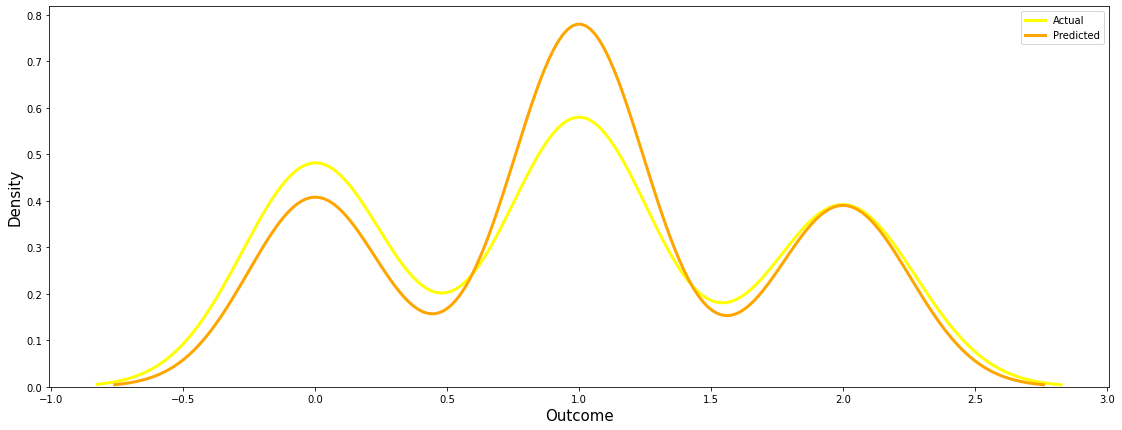

In [11]:
plt.figure(figsize = (19, 7))
sns.kdeplot(x = y, label = "Actual", linewidth = 3, color = "yellow")
sns.kdeplot(x = y_pred, label = "Predicted", linewidth = 3, color = "orange")
plt.xlabel("Outcome", size = 15)
plt.ylabel("Density", size = 15)
plt.legend()
plt.show()

In [12]:
accuracy_score = score = svm.score(X, y)
print("Accuracy of Model = ", accuracy_score)

Accuracy of Model =  0.9044943820224719


# SVC

In [13]:
X = juice.data
y = juice.target

In [14]:
svm = SVC()

svm.fit(X, y)

y_pred = svm.predict(X)

pd.DataFrame({"Actual": y, "Predict": y_pred})[::40]

,Actual,Predict
0,0,0
40,0,2
80,1,1
120,1,2
160,2,1


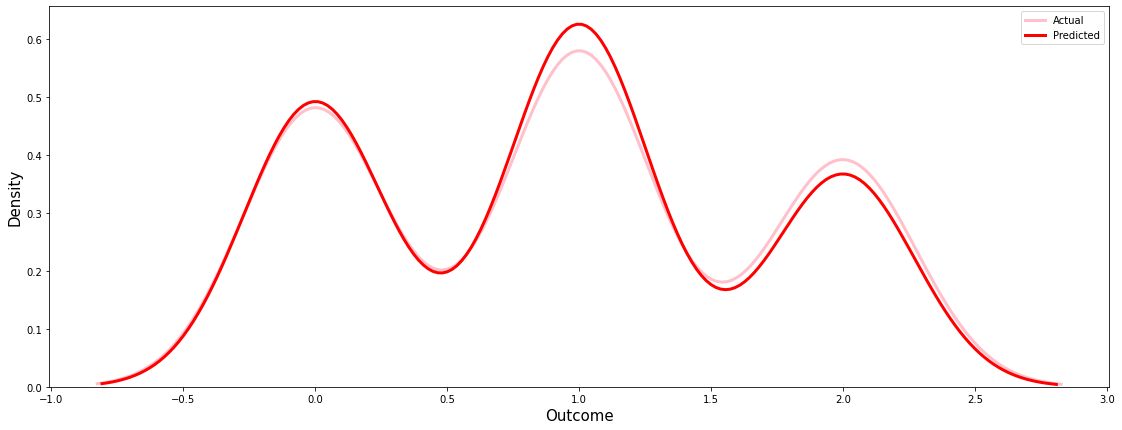

In [15]:
plt.figure(figsize = (19, 7))
sns.kdeplot(x = y, label = "Actual", linewidth = 3, color = "pink")
sns.kdeplot(x = y_pred, label = "Predicted", linewidth = 3, color = "red")
plt.xlabel("Outcome", size = 15)
plt.ylabel("Density", size = 15)
plt.legend()
plt.show()

In [16]:
accuracy = svm.score(X, y)
accuracy

0.7078651685393258

### Classification with Models

In [17]:
X = juice.data
y = juice.target

In [18]:
# Define the classifiers
classifiers = [LogisticRegression(), LinearSVC(), SVC(), KNeighborsClassifier()]

accuracy = []
# Fit the Classifiers
for c in classifiers:
    c.fit(X, y)
    score = c.score(X, y)
    accuracy.append(score)

In [19]:
data = pd.DataFrame({"Model": ["Logistic Regression", "Linear SVC", "SVC", "K Neighbors Classifier"],
              "Accuracy": [accuracy[0], accuracy[1], accuracy[2], accuracy[3]]})
data

,Model,Accuracy
0,Logistic Regression,0.966292
1,Linear SVC,0.460674
2,SVC,0.707865
3,K Neighbors Classifier,0.786517


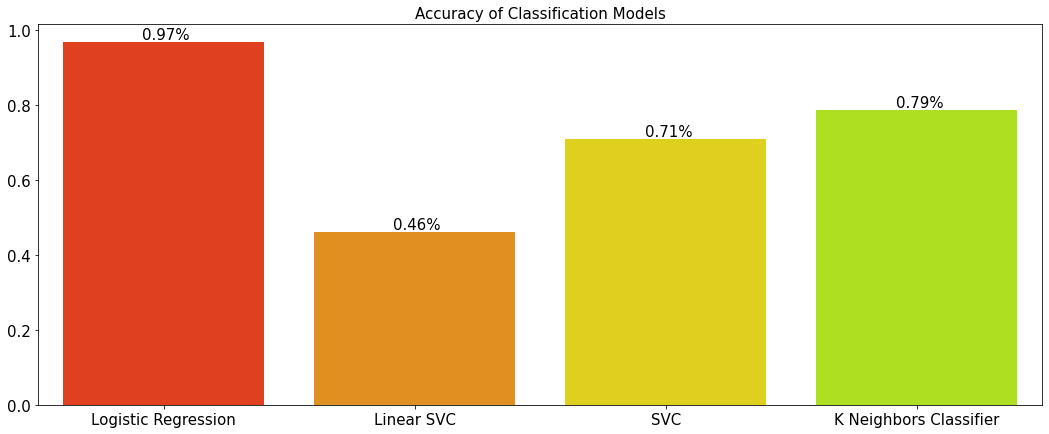

In [20]:
plt.figure(figsize = (18, 7))
graph = sns.barplot(x = "Model", y = "Accuracy", data = data, palette = "prism")
for p in graph.patches:
        graph.annotate('{:.02f}%'.format(p.get_height()), 
                      (p.get_x()+0.41, p.get_height()),
                       ha='center', va='bottom',color= 'black', size = 15)
plt.title("Accuracy of Classification Models", size = 15)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.xlabel(None)
plt.ylabel(None)
plt.show()